# JDH reproducibility

## What we have

> dataframe issue, article, binder url , language, reproducibility (fully/partially/none)

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import re


def is_editorial(tags):
    if not tags:
        return False
    
    return any(tag.get('name', '').lower() == 'editorial' for tag in tags)


def extract_programming_language(tags):
    if not tags:
        return None   
    for tag in tags:
        language = tag.get('data', {}).get('language', '').lower()
        if language in ['python', 'r']:
            return language
    return None

# API URL
api_url = "https://journalofdigitalhistory.org/api/articles/?format=json&limit=100"



# Make the API call
response = requests.get(api_url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON response
    response_data = response.json()

    # Extract the list of articles from the response
    results = response_data.get("results", [])
    data = []
    if results:
        data = []
        for result in results:
            # Extraire l'année de publication_date si elle existe
            pub_date = result.get('publication_date')
            year = None
            if pub_date:
                match = re.search(r'(\d{4})', pub_date)
                year = match.group(1) if match else None
    
            data.append({
                'issue': result.get('issue', {}).get('name'),
                'pid': result.get('abstract', {}).get('pid'),
                'title': result.get('abstract', {}).get('title'),
                'publication_date': year,
                'language': extract_programming_language(result.get('tags')),
                'binder_url': result.get('binder_url'),
                'editorial': is_editorial(result.get('tags')) 
        })
        df = pd.DataFrame(data)
    else:
        print("No articles found in the response.")

else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")
df

,issue,pid,title,publication_date,language,binder_url,editorial
0,History seeing through the web,7XSDVCtnbXva,‘Thanks for the moan!’ Disillusionment with th...,2025,python,https://mybinder.org/v2/gh/jdh-observer/7XSDVC...,False
1,History seeing through the web,hXsgcT9BZ5jP,Unlocking political web defacements for research,2025,python,https://mybinder.org/v2/gh/jdh-observer/hXsgcT...,False
2,DH China,JMU8e6tFQscz,Chinese Political and Cultural Elites: Twentie...,2025,r,None,False
3,DH China,69Xry3ztPAk5,Shaping the Transnational Public Sphere in Rep...,2024,r,https://mybinder.org/v2/gh/jdh-observer/69Xry3...,False
4,DH China,fwpktfFtn5jm,Eminent Chinese of the Shenbao (1872-1891). A ...,2024,r,None,False
5,DH China,NpQvUTkRCF5T,ReOrienting Digital History: New frontiers in ...,2024,None,None,True
6,Varia,6ig87tC5GKjQ,"Talking borders, history and digital hermeneutics",2025,python,https://mybinder.org/v2/gh/jdh-observer/6ig87t...,False
7,Varia,ZDFmmD3xv4S7,Exploring the simulation and visualization of ...,2025,python,https://mybinder.org/v2/gh/jdh-observer/ZDFmmD...,False
8,Varia,MzghFipgZWQq,Time: the Cost of Reproducibility,2025,python,https://mybinder.org/v2/gh/jdh-observer/MzghFi...,True
9,Varia,Gqh2Bf5W4TdK,The Secret History of the Mongols. A Digital H...,2024,None,None,False


## Articles having only binderurl

In [7]:
df_filtered = df[df['binder_url'].notna()]

In [3]:
import datetime


today = datetime.datetime.now().strftime('%Y-%m-%d')
filename = f'reproducibility_{today}.csv'
df_filtered.to_csv(filename, index=False)

## Articles need to be tagged with their state of reproducibility (fully/partially/not_binder/none)

In [4]:
> Added in the a csv


SyntaxError: invalid syntax (3336382139.py, line 1)

In [19]:
df_binder = pd.read_csv('reproducibility_2025-09-11_binder.csv', delimiter=';')

In [20]:
df_binder.head()

,issue,pid,title,publication_year,Language,binder_url,editorial,binder_launch,binder_comment,reproducibility,status,reprodicibility_comment,version,Unnamed: 13
0,History seeing through the web,7XSDVCtnbXva,‘Thanks for the moan!’ Disillusionment with th...,2025,python,https://mybinder.org/v2/gh/jdh-observer/7XSDVC...,False,True,NaN,fully,True,NaN,python-3.8,NaN
1,History seeing through the web,hXsgcT9BZ5jP,Unlocking political web defacements for research,2025,python,https://mybinder.org/v2/gh/jdh-observer/hXsgcT...,False,False,no runtime defined - jupyter-contrib-nbextensi...,fully,False,NaN,python-3.9.12,NaN
2,DH China,69Xry3ztPAk5,Shaping the Transnational Public Sphere in Rep...,2024,r,https://mybinder.org/v2/gh/jdh-observer/69Xry3...,False,True,still jupyter notebook,no_code,NaN,NaN,NaN,NaN
3,Varia,6ig87tC5GKjQ,"Talking borders, history and digital hermeneutics",2025,python,https://mybinder.org/v2/gh/jdh-observer/6ig87t...,False,True,still jupyter notebook,fully,True,one plotly graph,python-3.7,NaN
4,Varia,ZDFmmD3xv4S7,Exploring the simulation and visualization of ...,2025,python,https://mybinder.org/v2/gh/jdh-observer/ZDFmmD...,False,False,Failed to build numpy pandas,fully,False,It was not possible to do it via my binder > 2Go,python-3.10,NaN


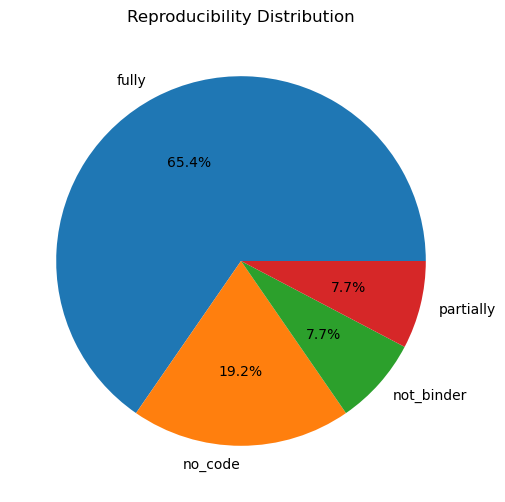

In [21]:
# Generate a pie chart for the 'reproducibility' column
df_binder['reproducibility'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6, 6))
plt.ylabel('')
plt.title('Reproducibility Distribution')
plt.show()

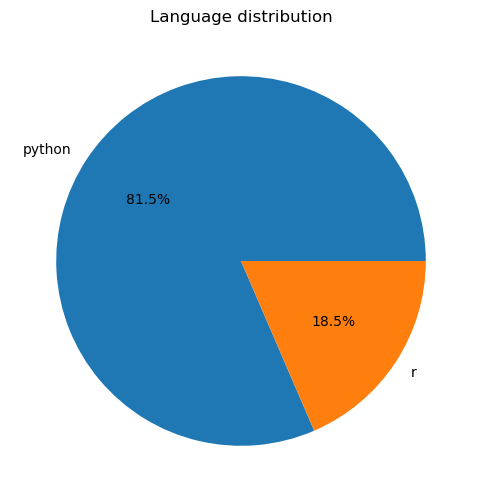

In [22]:
df_binder['Language'].str.lower().value_counts().plot.pie(autopct='%1.1f%%', figsize=(6, 6))
plt.ylabel('')
plt.title('Language distribution')
plt.show()

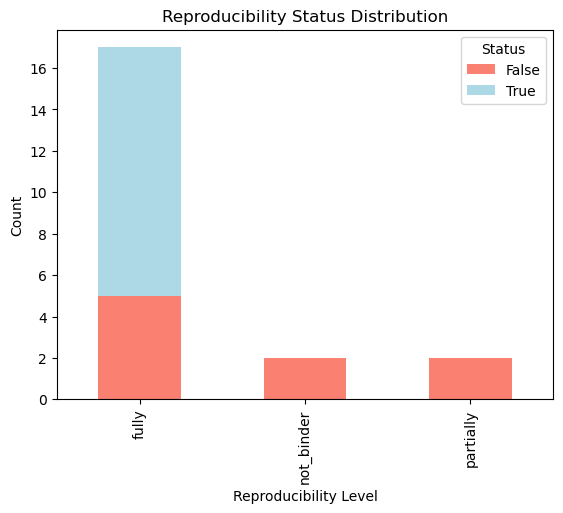

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crosstab pour compter
cross_tab = pd.crosstab(df_binder['reproducibility'], df_binder['status'])

# Stacked bar
cross_tab.plot(kind='bar', stacked=True, color=['salmon', 'lightblue'])
plt.title('Reproducibility Status Distribution')
plt.xlabel('Reproducibility Level')
plt.ylabel('Count')
plt.legend(title='Status')

## Test repo2Docker

In [ ]:

https://github.com/jupyterhub/repo2docker-action

## DOI

In [5]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import re


# API URL
api_url = "https://journalofdigitalhistory.org/api/articles/?format=json&limit=100"



# Make the API call
response = requests.get(api_url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON response
    response_data = response.json()

    # Extract the list of articles from the response
    results = response_data.get("results", [])
    data = []
    if results:
        data = []
        for result in results:
            # Extraire l'année de publication_date si elle existe
            pub_date = result.get('publication_date')
            year = None
            if pub_date:
                match = re.search(r'(\d{4})', pub_date)
                year = match.group(1) if match else None
    
            data.append({
                'pid': result.get('abstract', {}).get('pid'),
                'doi': result.get('doi')

        })
        df = pd.DataFrame(data)
    else:
        print("No articles found in the response.")

else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")
df

,pid,doi
0,7XSDVCtnbXva,10.1515/JDH.2023.0001
1,hXsgcT9BZ5jP,10.1515/JDH.2023.0003.R1
2,JMU8e6tFQscz,10.1515/JDH.2024.0004.R2
3,69Xry3ztPAk5,10.1515/JDH.2023.0017.R1
4,fwpktfFtn5jm,10.1515/JDH.2023.0012.R1
5,NpQvUTkRCF5T,10.1515/JDH.2024.0001.R1
6,6ig87tC5GKjQ,10.1515/JDH.2023.0020.R2
7,ZDFmmD3xv4S7,10.1515/JDH.2023.0016.R1
8,MzghFipgZWQq,10.1515/JDH.2025.0001.R1
9,Gqh2Bf5W4TdK,10.1515/JDH.2024.0010.R1
